In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Data/msds_view.csv"
data = pd.read_csv(path, low_memory=False)

In [ ]:
df = data[data['COHORT_GRADUATION_YEAR'] != 2024]

In [ ]:
data.head()

,GLOBAL_REGION,COUNTRY,INCOME_TIER,PROGRAM_INDUSTRY,PROFESSION,PROGRAM_TECH_OR_NOT,COHORT_GRADUATION_DATE,COHORT_GRADUATION_YEAR,COVID_ERA,DAYS_SINCE_GRADUATION,...,IS_NEET_PRE_GEN,FINANCIAL_SITUATION_PRE_GEN,CANNOT_MEET_DAILY_NEEDS_PRE_GEN,CAN_SAVE_PRE_GEN,LEARNER_SPECIAL_NEEDS,HAS_SPECIAL_NEEDS,DEMOGRAPHIC_BARRIERS_SCORE,DEMOGRAPHIC_BARRIERS_NULLS,EMPLOYMENT_NEED_SCORE,EMPLOYMENT_NEED_NULLS
0,SAMEA,India,Middle Income,Customer Service & Sales,Retail sales associate,Non tech developer,28/03/2023,2023,Post COVID,380,...,1.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,1.0
1,Europe,Italy,High Income,Customer Service & Sales,Retail sales associate,Non tech developer,10/03/2023,2023,Post COVID,398,...,0.0,Prefer not to say,0.0,0.0,Yes,1.0,1.0,1.0,3.0,0.0
2,APAC,Australia,High Income,Tech,Salesforce Developer,Tech developer,25/03/2022,2022,COVID,748,...,0.0,Can cover daily needs,0.0,0.0,NaN,NaN,3.0,1.0,4.0,1.0
3,Europe,Italy,High Income,Tech,Salesforce Developer,Tech developer,25/03/2022,2022,COVID,748,...,1.0,Prefer not to say,0.0,0.0,No,0.0,0.0,0.0,4.0,0.0
4,SAMEA,Kenya,Middle Income,Tech,Digital Customer Support,Non tech developer,25/02/2022,2022,COVID,776,...,1.0,Cannot cover daily needs,1.0,0.0,NaN,NaN,4.0,3.0,0.0,5.0


In [ ]:
data.shape


(149260, 76)

In [ ]:
# filter for rows where dismissal is false
df= data[data['IS_DISMISSED_DROPOUT'] != 1]

# filter for rows where 'is graduated' is true
df= data[data['IS_GRADUATED'] != 0]

In [ ]:
df.shape

(128761, 76)

In [ ]:
df.shape

(128761, 76)

In [ ]:
#Exclude special projects from program industry
df = df[df['PROGRAM_INDUSTRY'] != 'Special Project']

In [ ]:
df.shape

(126403, 76)

In [ ]:
# Create a new column 'India_not_india'
df['INDIA_NOT_INDIA'] = np.where(df['COUNTRY'] == 'India', 'India', 'Not_India')

<ipython-input-46-44941f72d160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INDIA_NOT_INDIA'] = np.where(df['COUNTRY'] == 'India', 'India', 'Not_India')


In [ ]:
df.shape

(126403, 77)

In [ ]:
df.shape


(126403, 77)

In [ ]:
# Replace NaN in attainment with 0
df['ATTAINMENT_90D'] = df['ATTAINMENT_90D'].fillna(0)
df['ATTAINMENT_180D'] = df['ATTAINMENT_180D'].fillna(0)


## **Dimensionality Reduction for Variables**

In [ ]:
# Get unique values in the 'Dependants' column
unique_dependants = df['DEPENDANTS'].unique()
print(unique_dependants)

['1' 'Prefer not to say' '0' nan '沒有' 'Oui' 'Prefiero no contestar' '5+'
 '2' '4' '3' 'Non' '5' 'Sí' 'More than 9' 'Je préfère ne pas répondre'
 '10 or more' '不便透露' '有' 'Choose not to say' 'Prefiero no responder'
 'Preferisco non rispondere' 'Eu não me sustento atualmente']


In [ ]:
#df0['HAS_DEPENDANTS'] = df1['DEPENDANTS'].apply(lambda x: 0 if x == 0 else 1)
# Map values to 0 or 1
mapping = {
    '0': 0,
    'Prefer not to say': 0,
    '沒有': 0,  # Chinese for "no"
    'Oui': 1,   # French for "yes"
    'Prefiero no contestar': 0,  # Spanish for "I prefer not to answer"
    '5+': 1,    # Assuming 5 or more dependants means there are dependants
    '2': 1,
    '4': 1,
    '3': 1,
    'Non': 0,   # French for "no"
    '5': 1,
    'Sí': 1,    # Spanish for "yes"
    'More than 9': 1,
    'Je préfère ne pas répondre': 0,  # French for "I prefer not to answer"
    '10 or more': 1,
    '不便透露': 0,  # Chinese for "inconvenient to disclose"
    '有': 1,     # Chinese for "have"
    'Choose not to say': 0,
    'Prefiero no responder': 0,   # Spanish for "I prefer not to answer"
    'Preferisco non rispondere': 0,  # Italian for "I prefer not to answer"
    'Eu não me sustento atualmente': 0   # Portuguese for "I am not currently supporting myself"
}


# Map the values to 0 or 1 using the mapping dictionary
df['HAS_DEPENDANTS'] = df['DEPENDANTS'].map(mapping).fillna(0).astype(int)

In [ ]:
# Map values to categories
mapping_work_experience = {
    'No work experience': 'No work experience',
    'Between 2 and 5 years': 'More than one year',
    '0 to 1 year': 'Less than one year',
    '1 to 2 years': 'More than one year',
    '5 or more years': 'More than one year'
}

# Map the values to desired categories using the mapping dictionary
df['WORK_EXPERIENCE_PREGEN'] = df['WORK_EXPERIENCE_PRE_GEN'].map(mapping_work_experience).fillna('No work experience')


In [ ]:
# Get unique values in the 'mths pregen' column
mth = df['MONTHS_UNEMPLOYED_PRE_GEN'].unique()
print(mth)

[nan '04-Jun' '>12' '0-3' '0 to 3 months' '07-Dec' 'Da 7-12 mesi'
 'Never Worked' 'Entre 4 y 6 meses' '4 to 6 months' '0 à 3 mois'
 '7 - 12 個月' 'Entre 0 y 3 meses' 'Da meno di 3 mesi' 'Entre 7 y 12 meses'
 '7 à 12 mois' '03-Jun' '06-Dec' '0-3 meses' 'Non sono disoccupato'
 'Da più di 12 mesi' 'No aplica, tengo empleo'
 'NA: I am currently employed' 'Da 4-6 mesi' '7 to 12 months'
 '12 months +' '0 - 3 個月' '6 to 12 months'
 'No aplica, estoy estudiando y no necesito trabajar todavía' '沒有找工作'
 '多於12個月' '4 à 6 mois' '0 to 3 Months' "Je n'ai jamais travaillé" '超過一年'
 '1 個月' '6 -12 meses' '4 - 6 個月' 'Je ne suis pas au chômage']


In [ ]:
# Map values to desired categories
mapping_months_unemployed = {
    'No work experience': 'No work experience',
    'Never Worked': 'No work experience',
    "Je n'ai jamais travaillé": 'No work experience',
    'Non ho mai lavorato': 'No work experience',
    '沒有找工作': 'No work experience',
    'Je ne suis pas au chômage': 'No work experience',
    '0 to 3 months': 'Less than six months',
    '0 à 3 mois': 'Less than six months',
    'Entre 0 y 3 meses': 'Less than six months',
    'Da meno di 3 mesi': 'Less than six months',
    'No aplica, tengo empleo': 'Employed',
    'NA: I am currently employed': 'Employed',
    'Non sono disoccupato': 'Employed',
    'Je ne suis pas au chômage': 'Employed',
    'No aplica, estoy estudiando y no necesito trabajar todavía': 'Employed',
    '4-6': 'Less than six months',
    '4 - 6 個月': 'Less than six months',
    'Entre 4 y 6 meses': 'Less than six months',
    'Entre 4 e 6 meses': 'Less than six months',
    'Entre 4 et 6 mois': 'Less than six months',
    '4 à 6 mois': 'Less than six months',
    '4 to 6 months': 'Less than six months',
    '4 - 6 meses': 'Less than six months',
    'Da 4-6 mesi': 'Less than six months',
    '4 - 6': 'Less than six months',
    '7-12': 'More than six months',
    '7 - 12 個月': 'More than six months',
    '7 - 12': 'More than six months',
    '7 - 12 mois': 'More than six months',
    '7 à 12 mois': 'More than six months',
    'Entre 7 y 12 meses': 'More than six months',
    'Da 7-12 mesi': 'More than six months',
    '6 - 12 個月': 'More than six months',
    '6 - 12 meses': 'More than six months',
    '6 -12 meses': 'More than six months',
    '6 - 12': 'More than six months',
    '6 - 12 mois': 'More than six months',
    '>12': 'More than 12 months',
    'Da più di 12 mesi': 'More than 12 months',
    '12 months +': 'More than 12 months',
    '多於12個月': 'More than 12 months',
    '超過一年': 'More than 12 months',
    '超過一年': 'More than 12 months',
    '0 - 3 個月': 'Less than six months',
    '0 - 3 Months': 'Less than six months',
    '0-3 meses': 'Less than six months',
    '0-3 months': 'Less than six months',
    '0 à 3 mois': 'Less than six months',
    '0 à 3 mois': 'Less than six months',
    '0 to 3 months': 'Less than six months',
    'Entre 0 y 3 meses': 'Less than six months',
    'Entre 0 y 3 meses': 'Less than six months',
    'Entre 0 y 3 meses': 'Less than six months',
    '0 to 1 year': 'Less than 12 months',
    '1 to 2 years': 'More than 12 months',
    '0-3 meses': 'Less than six months',
    '3 - 6': 'More than six months',
    '6 - 12': 'More than 12 months',
    '1 個月': 'Less than six months',
    'No aplica, tengo empleo': 'Employed',
    'No aplica, estoy estudiando y no necesito trabajar todavía': 'Employed'
}

# Map the values to desired categories using the mapping dictionary
df['MONTHS_UNEMPLOYED_PREGEN'] = df['MONTHS_UNEMPLOYED_PRE_GEN'].map(mapping_months_unemployed).fillna('No work experience')


In [ ]:
# Get unique values in the 'Employments status' column
mth = df['EMPLOYMENT_STATUS_PRE_GEN'].unique()
print(mth)

[nan 'Unemployed' 'Employed' '最近7天內我一直從事有薪工作'
 'Non sono stato impegnato in lavori retribuiti negli ultimi 7 giorni'
 'Non' 'Disoccupato' '最近7天內我沒有從事有薪工作' 'Sí' 'No tengo empleo'
 'Sono stato impegnato in lavori retribuiti negli ultimi 7 giorni'
 'Sono disoccupato'
 'Ho lavorato in passato, ma attualmente non sto lavorando'
 'Sto ancora studiando' 'Trabajo de tiempo parcial (<40 horas por semana)'
 'Occupato part-time' '過去7天內我沒有從事有薪工作' 'I am in a Permanent role'
 'Sto ancora studiando (es., scuola, università)'
 'Ho attualmente un lavoro part-time'
 'Tiempo parcial (menos de 40 horas a la semana)' 'Oui'
 'I am on a Zero hours contract' 'Occupato full-time' ' 不便透露'
 'Ho attualmente un lavoro a tempo pieno'
 'Tiempo completo (40 horas o más a la semana)' 'Studying part-time']


In [ ]:
# Map values to categories
mapping_employment_status = {
    'Employed': 'Employed',
    '最近7天內我一直從事有薪工作': 'Employed',  # Chinese for "I have been employed in paid work in the past 7 days"
    'Non sono stato impegnato in lavori retribuiti negli ultimi 7 giorni': 'Unemployed',  # Italian for "I have not been engaged in paid work in the past 7 days"
    'Non': 'Unemployed',  # French for "No"
    'Disoccupato': 'Unemployed',  # Italian for "Unemployed"
    '最近7天內我沒有從事有薪工作': 'Unemployed',  # Chinese for "I have not been engaged in paid work in the past 7 days"
    'Sí': 'Employed',  # Spanish for "Yes"
    'No tengo empleo': 'Unemployed',  # Spanish for "I do not have a job"
    'Sono stato impegnato in lavori retribuiti negli ultimi 7 giorni': 'Employed',  # Italian for "I have been engaged in paid work in the past 7 days"
    'Ho lavorato in passato, ma attualmente non sto lavorando': 'Unemployed',  # Italian for "I have worked in the past, but currently I am not working"
    'Sto ancora studiando': 'Unemployed',  # Italian for "I am still studying"
    'Trabajo de tiempo parcial (<40 horas por semana)': 'Employed',  # Spanish for "Part-time work (<40 hours per week)"
    'Occupato part-time': 'Employed',  # Italian for "Part-time employed"
    '過去7天內我沒有從事有薪工作': 'Unemployed',  # Chinese for "I have not been engaged in paid work in the past 7 days"
    'I am in a Permanent role': 'Employed',
    'Sto ancora studiando (es., scuola, università)': 'Unemployed',  # Italian for "I am still studying (e.g., school, university)"
    'Ho attualmente un lavoro part-time': 'Employed',  # Italian for "I currently have a part-time job"
    'Tiempo parcial (menos de 40 horas a la semana)': 'Employed',  # Spanish for "Part-time (less than 40 hours per week)"
    'Oui': 'Employed',  # French for "Yes"
    'I am on a Zero hours contract': 'Employed',
    'Occupato full-time': 'Employed',  # Italian for "Full-time employed"
    ' 不便透露': 'Unemployed',  # Chinese for "Inconvenient to disclose"
    'Ho attualmente un lavoro a tempo pieno': 'Employed',  # Italian for "I currently have a full-time job"
    'Tiempo completo (40 horas o más a la semana)': 'Employed',  # Spanish for "Full-time (40 hours or more per week)"
    'Studying part-time': 'Unemployed'  # English for "Studying part-time"
}

# Map the values to 'Employed' or 'Unemployed' using the mapping dictionary
df['EMPLOYMENT_STATUS_PREGEN'] = df['EMPLOYMENT_STATUS_PRE_GEN'].map(mapping_employment_status).fillna('Unemployed')


In [ ]:
#replace nan with 0 in numerical columns except AGE
for column in df.columns:
    if df[column].dtype == 'float64' and column != 'AGE_NOW':  # Checking if column is of float type and not 'AGE_NOW'
        df[column] = df[column].fillna(0)


In [ ]:
df.shape


(126403, 80)

In [ ]:
df.head()

,GLOBAL_REGION,COUNTRY,INCOME_TIER,PROGRAM_INDUSTRY,PROFESSION,PROGRAM_TECH_OR_NOT,COHORT_GRADUATION_DATE,COHORT_GRADUATION_YEAR,COVID_ERA,DAYS_SINCE_GRADUATION,...,LEARNER_SPECIAL_NEEDS,HAS_SPECIAL_NEEDS,DEMOGRAPHIC_BARRIERS_SCORE,DEMOGRAPHIC_BARRIERS_NULLS,EMPLOYMENT_NEED_SCORE,EMPLOYMENT_NEED_NULLS,INDIA_NOT_INDIA,WORK_EXPERIENCE_PREGEN,MONTHS_UNEMPLOYED_PREGEN,EMPLOYMENT_STATUS_PREGEN
0,SAMEA,India,Middle Income,Customer Service & Sales,Retail sales associate,Non tech developer,28/03/2023,2023,Post COVID,380,...,NaN,0.0,4.0,2.0,3.0,1.0,India,No work experience,No work experience,Unemployed
1,Europe,Italy,High Income,Customer Service & Sales,Retail sales associate,Non tech developer,10/03/2023,2023,Post COVID,398,...,Yes,1.0,1.0,1.0,3.0,0.0,Not_India,More than one year,No work experience,Unemployed
2,APAC,Australia,High Income,Tech,Salesforce Developer,Tech developer,25/03/2022,2022,COVID,748,...,NaN,0.0,3.0,1.0,4.0,1.0,Not_India,More than one year,No work experience,Employed
3,Europe,Italy,High Income,Tech,Salesforce Developer,Tech developer,25/03/2022,2022,COVID,748,...,No,0.0,0.0,0.0,4.0,0.0,Not_India,Less than one year,No work experience,Unemployed
4,SAMEA,Kenya,Middle Income,Tech,Digital Customer Support,Non tech developer,25/02/2022,2022,COVID,776,...,NaN,0.0,4.0,3.0,0.0,5.0,Not_India,No work experience,More than 12 months,Unemployed


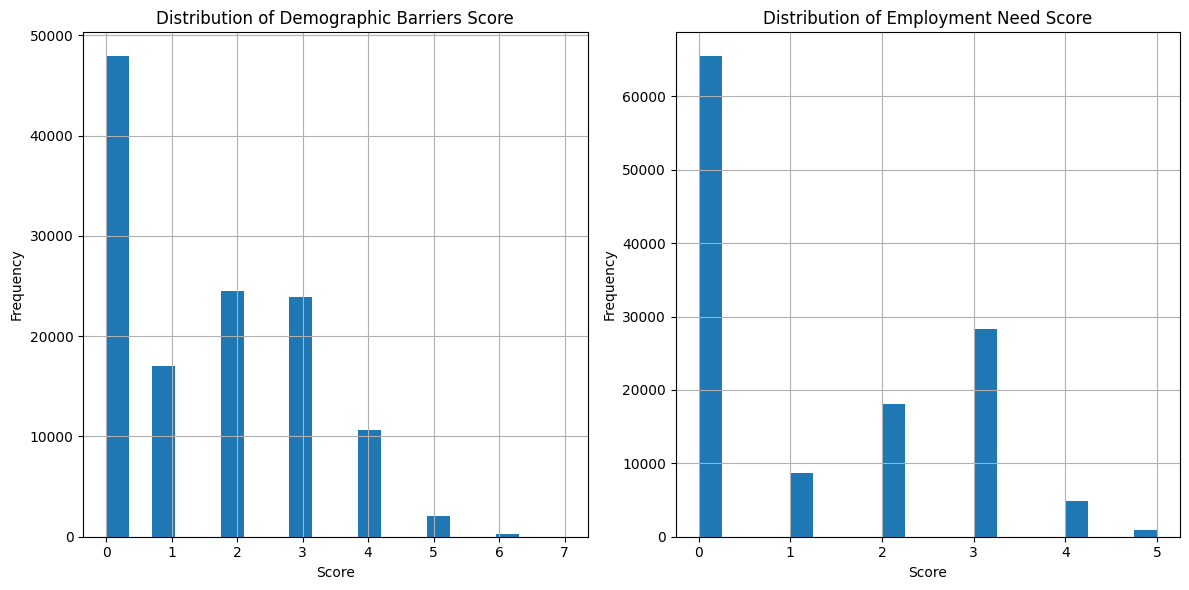

       DEMOGRAPHIC_BARRIERS_SCORE  EMPLOYMENT_NEED_SCORE
count               126403.000000          126403.000000
mean                     1.524149               1.218120
std                      1.461339               1.404111
min                      0.000000               0.000000
25%                      0.000000               0.000000
50%                      1.000000               0.000000
75%                      3.000000               3.000000
max                      7.000000               5.000000


In [ ]:
#Check the distribution of the composite scores
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['DEMOGRAPHIC_BARRIERS_SCORE'].hist(bins=20)
plt.title('Distribution of Demographic Barriers Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['EMPLOYMENT_NEED_SCORE'].hist(bins=20)
plt.title('Distribution of Employment Need Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show summary statistics
print(df[['DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE']].describe())


In [ ]:
#check the correlation to see if one can determine the other

correlation = df[['DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE']].corr(method='spearman')
print(correlation)

#They are moderately correlated so we can apply either a negative binomial regression or poissson

                            DEMOGRAPHIC_BARRIERS_SCORE  EMPLOYMENT_NEED_SCORE
DEMOGRAPHIC_BARRIERS_SCORE                    1.000000               0.593817
EMPLOYMENT_NEED_SCORE                         0.593817               1.000000


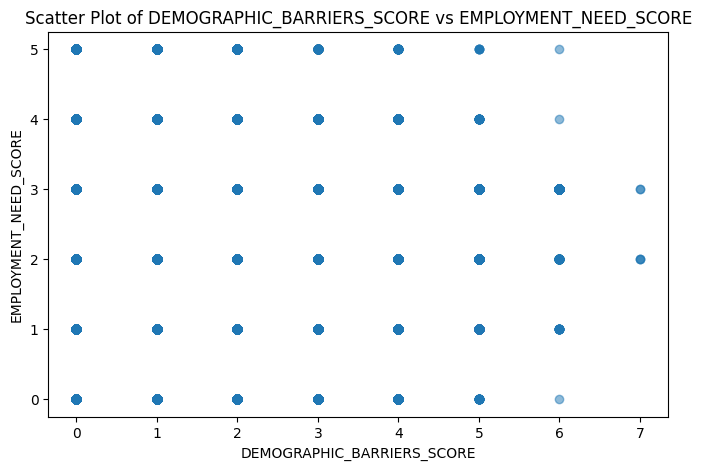

In [ ]:
#check the linear relationship:
variable_pairs = [('DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE')]
for x_var, y_var in variable_pairs:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_var], df[y_var], alpha=0.5)
    plt.title(f'Scatter Plot of {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

#Relationship is not Linear

In [ ]:
from sklearn.impute import KNNImputer

# Initialize  Imputer
imputer = KNNImputer(n_neighbors=5)

# Isolate columns to impute along with other numeric columns for KNN to work properly
columns_to_impute = ['DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE']
numeric_data = df[columns_to_impute]

additional_columns = df.select_dtypes(include=[np.number]).drop(columns_to_impute, errors='ignore').columns.tolist()
imputation_data = df[columns_to_impute] #can include other colums here

# Fit data
imputer.fit(imputation_data)

# Transform the data and replace the imputed columns in df
df[columns_to_impute] = imputer.transform(imputation_data)[..., :len(columns_to_impute)]


In [ ]:
has_nulls = df['DEMOGRAPHIC_BARRIERS_SCORE'].isnull().any()
print(f"Does 'column_name' have null values? {has_nulls}")

Does 'column_name' have null values? False


In [ ]:
# Convert only the 'Demographic_barriers_score' and 'Employment_need_score' columns to numeric types
#df['DEMOGRAPHIC_BARRIERS_SCORE'] = pd.to_numeric(df['DEMOGRAPHIC_BARRIERS_SCORE'], errors='coerce')
#df['EMPLOYMENT_NEED_SCORE'] = pd.to_numeric(df['EMPLOYMENT_NEED_SCORE'], errors='coerce')


In [ ]:
#df[['DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE']].dtypes

DEMOGRAPHIC_BARRIERS_SCORE    float64
EMPLOYMENT_NEED_SCORE         float64
dtype: object

In [ ]:
attainment90_df = df[['GLOBAL_REGION', 'INCOME_TIER', 'COVID_ERA','PROGRAM_TECH_OR_NOT',
                    'IS_NEET_PRE_GEN', 'DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE','INDIA_NOT_INDIA',
                     'ATTAINMENT_90D']]

In [ ]:
attainment180_df = df[['GLOBAL_REGION', 'INCOME_TIER', 'COVID_ERA','PROGRAM_TECH_OR_NOT',
                    'IS_NEET_PRE_GEN', 'DEMOGRAPHIC_BARRIERS_SCORE', 'EMPLOYMENT_NEED_SCORE','INDIA_NOT_INDIA',
                    'ATTAINMENT_180D']]

In [ ]:
df.shape


(126403, 80)

## **Create and Run Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Drop rows with missing values in selected columns
attainment90_df  = attainment90_df.dropna()

# Encode categorical variables
le = LabelEncoder()
attainment90_df ['ATTAINMENT_90D'] = le.fit_transform(attainment90_df['ATTAINMENT_90D'])

# Define features (X) and target variable (y)
X = attainment90_df .drop(['ATTAINMENT_90D'], axis=1)  # Features
y = attainment90_df ['ATTAINMENT_90D']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Print feature coefficients
feature_names = X.columns
coefficients = logreg_model.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


<ipython-input-70-d3fab6424e2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment90_df ['ATTAINMENT_90D'] = le.fit_transform(attainment90_df['ATTAINMENT_90D'])


Accuracy: 0.6655056402137344
Confusion Matrix:
 [[8545 4167]
 [4284 8269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67     12712
           1       0.66      0.66      0.66     12553

    accuracy                           0.67     25265
   macro avg       0.67      0.67      0.67     25265
weighted avg       0.67      0.67      0.67     25265

IS_NEET_PRE_GEN: 0.03884650954944642
DEMOGRAPHIC_BARRIERS_SCORE: -0.007401268773657421
EMPLOYMENT_NEED_SCORE: 0.11884896726278268
GLOBAL_REGION_APAC: 0.04414488359125438
GLOBAL_REGION_Americas: -0.20263521583528257
GLOBAL_REGION_Europe: 0.11355627914575601
GLOBAL_REGION_SAMEA: 0.06272781990410953
INCOME_TIER_High Income: -0.1038763024774379
INCOME_TIER_Middle Income: 0.10387630247743802
COVID_ERA_COVID: 0.19324510828334832
COVID_ERA_Post COVID: -0.48687903057370546
COVID_ERA_Pre COVID: 0.3072424359162399
PROGRAM_TECH_OR_NOT_Non tech developer: 0.1334142788568759
PROGR

In [ ]:
import statsmodels.api as sm

# Add a constant to the model (needed for statsmodels)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_sm)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())


         Current function value: 0.619636
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         ATTAINMENT_90D   No. Observations:               101057
Model:                          Logit   Df Residuals:                   101045
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.1058
Time:                        09:02:21   Log-Likelihood:                -62619.
converged:                      False   LL-Null:                       -70029.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0565      0.007     -8.300      0.000      -0.070      -0.043
x1             0.0388      0.009      4.558      0.000       0.022       0.055
x2            -0.0073      0.010     -0.735      0.4

In [ ]:
# Drop rows with missing values in selected columns
attainment180_df  = attainment180_df.dropna()

# Encode categorical variables
le = LabelEncoder()
attainment180_df ['ATTAINMENT_180D'] = le.fit_transform(attainment180_df['ATTAINMENT_180D'])

# Define features (X) and target variable (y)
X = attainment180_df .drop(['ATTAINMENT_180D'], axis=1)  # Features
y = attainment180_df ['ATTAINMENT_180D']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Print feature coefficients
feature_names = X.columns
coefficients = logreg_model.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


<ipython-input-73-567a5d13aac4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attainment180_df ['ATTAINMENT_180D'] = le.fit_transform(attainment180_df['ATTAINMENT_180D'])


Accuracy: 0.7074609143083317
Confusion Matrix:
 [[8452 4181]
 [3210 9422]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70     12633
           1       0.69      0.75      0.72     12632

    accuracy                           0.71     25265
   macro avg       0.71      0.71      0.71     25265
weighted avg       0.71      0.71      0.71     25265

IS_NEET_PRE_GEN: 0.04891787573332696
DEMOGRAPHIC_BARRIERS_SCORE: -0.041188207284970406
EMPLOYMENT_NEED_SCORE: 0.047015559465290034
GLOBAL_REGION_APAC: 0.04819855434832456
GLOBAL_REGION_Americas: -0.21497315276516943
GLOBAL_REGION_Europe: 0.17834304574776313
GLOBAL_REGION_SAMEA: 0.024337519239885468
INCOME_TIER_High Income: -0.12939140552658032
INCOME_TIER_Middle Income: 0.12939140552658032
COVID_ERA_COVID: 0.3025587690750667
COVID_ERA_Post COVID: -0.6195683844761628
COVID_ERA_Pre COVID: 0.3334918995538781
PROGRAM_TECH_OR_NOT_Non tech developer: 0.07857839419610499
PRO

In [ ]:
import statsmodels.api as sm

# Add a constant to the model (needed for statsmodels)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_sm)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())


         Current function value: 0.589127
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:        ATTAINMENT_180D   No. Observations:               101057
Model:                          Logit   Df Residuals:                   101045
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Apr 2024   Pseudo R-squ.:                  0.1500
Time:                        09:02:44   Log-Likelihood:                -59535.
converged:                      False   LL-Null:                       -70044.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0467      0.007     -6.608      0.000      -0.061      -0.033
x1             0.0488      0.009      5.513      0.000       0.031       0.066
x2            -0.0411      0.010     -3.965      0.0